In [1]:
import numpy as np
from astropy.table import Table
from astropy.table import vstack, hstack
from astropy.modeling import models, fitting
import scipy.optimize
from astropy.io import ascii
from matplotlib import pyplot as plt

In [2]:
trees_low_a23 = ascii.read('TS09_low_a23_fkin3_fIII10_Nfrag1.dat', delimiter = ' ')

In [3]:
trees_low_a23

scale,id,desc_scale,desc_id,num_prog(4),pid(5),upid(6),desc_pid(7),phantom,sam_mvir(9),mvir,rvir,rs(12),vrms(13),mmp?(14),scale_of_last_MM(15),vmax(16),x(17),y(18),z(19),vx(20),vy(21),vz(22),Jx(23),Jy(24),Jz(25),Spin(26),Breadth_first_ID(27),Depth_first_ID(28),Tree_root_ID,Orig_halo_ID(30),Snap_num(31),Next_coprogenitor_depthfirst_ID(32),Last_progenitor_depthfirst_ID(33),enriched,E_SN,num_SN,m_popIII,m_popII,m_popII_LW,polluted,pristine,R_ejecta,R_enrich,M_metal,M_metal_IGM,III_enrich,II_enrich,enricher,III_new,II_new,N_DCBH,N_PISN,N_CCSN
float64,int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64
0.1408,2905843,0.0,-1,9,-1,-1,-1,0,1455000000.0,1455000000.0,28.13,2.61,46.02,1,0.1263,40.2,0.2279,1.54963,0.62963,10.6,-0.17,-5.3,0.7831,-0.3143,-0.5367,0.01215,0,0,2905843,0,82,-1,5629,1,1.6079999999999997e+53,536,2322.9201066524947,51547793.58364045,7197.52755354682,1,2,0.0,0.0,32417.929850894452,0.0,0,1,2,0.0,1628002.3051391565,1,0,0
0.1399,2852838,0.1408,2905843,3,-1,-1,-1,0,1369670000.0,1335000000.0,27.34,2.301,46.99,1,0.1263,39.34,0.2239,1.53362,0.63094,12.24,0.36,-6.35,0.8129,-0.2941,-0.5026,0.01246,1,1,2905843,0,81,3054,3053,1,1.5329999999999998e+53,511,1250.5890151921235,32626927.08237215,6845.260253892808,1,1,0.0,0.0,20214.936785516136,0.0,0,1,2,0.0,1620471.1094233065,1,0,0
0.1399,2852839,0.1408,2905843,4,2852838,2852838,-1,0,318100000.0,318100000.0,8.32,2.301,45.11,0,0.0829,34.28,0.22758,1.54982,0.62989,18.25,5.06,-8.45,0.8129,-0.2941,-0.5026,0.01246,2,3054,2905843,24,81,5368,5367,1,2.55e+52,85,1072.3310914603712,17292864.196129143,1180.765358353721,1,1,0.0,0.0,11486.603954628174,0.0,0,1,2,0.0,303687.9553849706,0,0,0
0.1399,2852842,0.1408,2905843,1,2852838,2852838,-1,0,789200.0,789200.0,2.35,2.301,4.72,0,0.0734,3.39,0.21069,1.54237,0.63791,18.17,4.83,29.11,0.8129,-0.2941,-0.5026,0.01246,3,5368,2905843,16940,81,5427,5426,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0
0.1399,2852843,0.1408,2905843,1,2852838,2852838,-1,0,706100.0,706100.0,2.32,2.301,4.57,0,0.0747,3.47,0.22678,1.54028,0.64015,-40.44,1.68,16.64,0.8129,-0.2941,-0.5026,0.01246,4,5427,2905843,18748,81,5485,5484,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0
0.1399,2852845,0.1408,2905843,1,2852838,2852838,-1,0,313800.0,313800.0,1.71,2.301,2.75,0,0.1121,2.52,0.2355,1.54844,0.62389,-37.92,-33.85,11.22,0.8129,-0.2941,-0.5026,0.01246,5,5485,2905843,39039,81,5512,5511,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0
0.1399,2852846,0.1408,2905843,1,2852838,2852838,-1,0,304600.0,304600.0,1.73,2.301,2.52,0,0.1086,2.49,0.24823,1.54127,0.63297,-36.26,20.54,-29.68,0.8129,-0.2941,-0.5026,0.01246,6,5512,2905843,39715,81,5542,5541,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0
0.1399,2852847,0.1408,2905843,1,2852838,2852838,-1,0,295400.0,295400.0,1.76,2.301,2.71,0,0.098,2.77,0.22277,1.52296,0.63776,35.38,20.16,-48.09,0.8129,-0.2941,-0.5026,0.01246,7,5542,2905843,40970,81,5581,5580,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0
0.1399,2852849,0.1408,2905843,1,2852838,2852838,-1,0,249200.0,249200.0,1.7,2.301,2.82,0,0.1263,2.26,0.23611,1.55424,0.63215,-34.79,22.38,13.28,0.8129,-0.2941,-0.5026,0.01246,8,5581,2905843,46530,81,5595,5594,1,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0


In [4]:
#--- setting variables --- #

#def redshift(a): #lowercase z = redshift (cosmological); upper case Z = metallicity
   # return (1/a)-1

pop_III_SF = trees_low_a23['III_new'] > 0.0 #pop III star formation

rvir = trees_low_a23['rvir'][pop_III_SF].quantity
mvir = trees_low_a23['mvir'][pop_III_SF].quantity # masked virial mass of halos
#Z = trees_low_a23['rs(12)'][pop_III_SF].quantity #masked redshift
scale = trees_low_a23['scale'][pop_III_SF].quantity
redshift = (1/scale)-1

scale_bins = np.unique(trees_low_a23['scale'][pop_III_SF])

RootID_23 = trees_low_a23['Tree_root_ID'][pop_III_SF].quantity #masking root IDs

print('mvir:' ,len(mvir))
print('redshift:' ,len(redshift))
print('Root ID:' ,len(RootID_23))

mvir: 162
redshift: 162
Root ID: 162


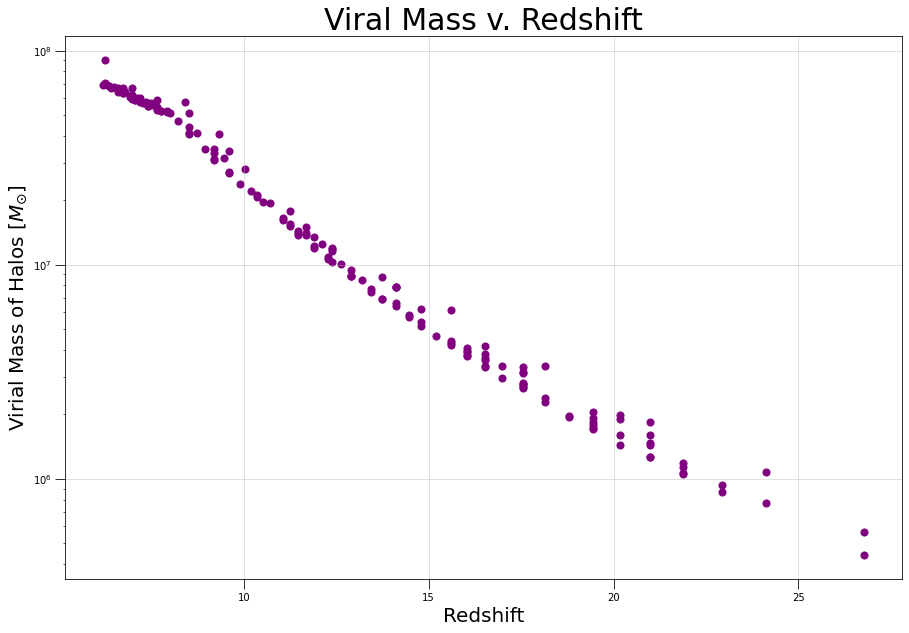

In [5]:
x = redshift
y = mvir
#xlin = np.linspace(0,7,162)

#lower = (y < 2.5*1e7) & (x < 3.5)
#upper = (x < 2)

#model_poly = models.Polynomial1D(degree = 2)
#fitter_poly = fitting.LinearLSQFitter()
#best_fit_poly = fitter_poly(model_poly, x, y)
#best_fit_poly1 = fitter_poly(model_poly, x[lower], y[lower]-0.035e8)
#best_fit_poly2 = fitter_poly(model_poly, x[upper] - 0.8, y[upper]+ 1e6)

fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
ax.scatter(x,y, c = 'purple', s = 50)
ax.set_yscale('log')
#ax.plot(xlin, best_fit_poly(xlin), color = 'r')
#ax.plot(xlin, best_fit_poly1(xlin), color = 'b')
#ax.plot(xlin, best_fit_poly2(xlin), color = 'b')
#ax.fill_between(xlin, best_fit_poly1(xlin), best_fit_poly2(xlin), 
                #color = 'silver', alpha = 0.2)

ax.set_xlabel('Redshift', fontsize = 20)  # Add an x-label to the axes.
ax.set_ylabel('Virial Mass of Halos [$M_{\odot}$]', fontsize = 20)  # Add a y-label to the axes.
ax.set_title("Viral Mass v. Redshift", fontsize = 30)  # Add a title to the axes.
ax.tick_params(axis = 'x', length = 10) 
ax.tick_params(axis = 'y', length = 10) 
#ax.set_ylim(-0.1e8,1e8)
#ax.set_xlim(0,6)
ax.grid(linestyle = '-', alpha = 0.5)


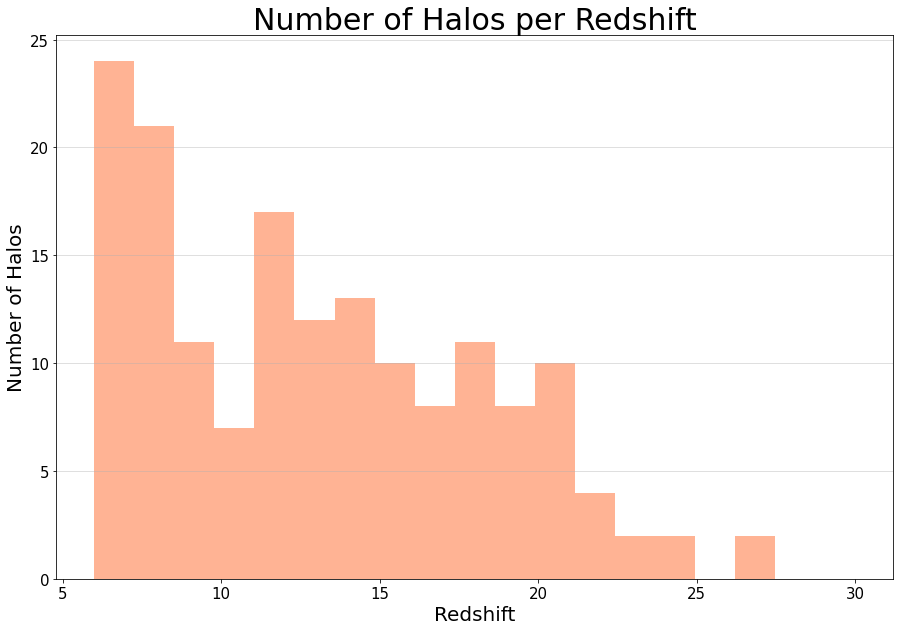

In [6]:
x = redshift

plt.figure(figsize=(15,10))
plt.hist(x, bins = np.linspace(6,30,20), color = 'lightsalmon', alpha= 0.8)
plt.title('Number of Halos per Redshift', fontsize = 30)
plt.xlabel('Redshift', fontsize = 20)
plt.ylabel('Number of Halos', fontsize = 20)
plt.xticks(fontsize = (15))
plt.yticks(fontsize = (15))
plt.grid(axis = 'y', alpha = 0.5)


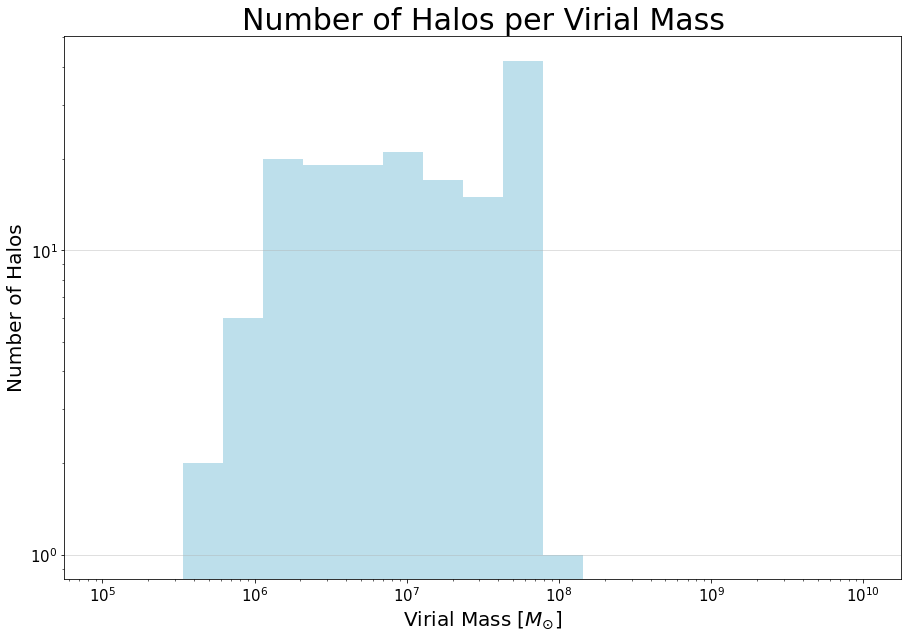

In [7]:
x = mvir

plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(x, bins = np.logspace(5,10,20), #make log of these numbers!!! (5,10,20)
                            color = 'lightblue', alpha= 0.8, log = True)
plt.title('Number of Halos per Virial Mass', fontsize = 30)
plt.xlabel('Virial Mass [$M_{\odot}$]', fontsize = 20)
plt.xscale('log')
plt.ylabel('Number of Halos', fontsize = 20)
plt.xticks(fontsize = (15))
plt.yticks(fontsize = (15))
plt.grid(axis = 'y', alpha = 0.5)

    

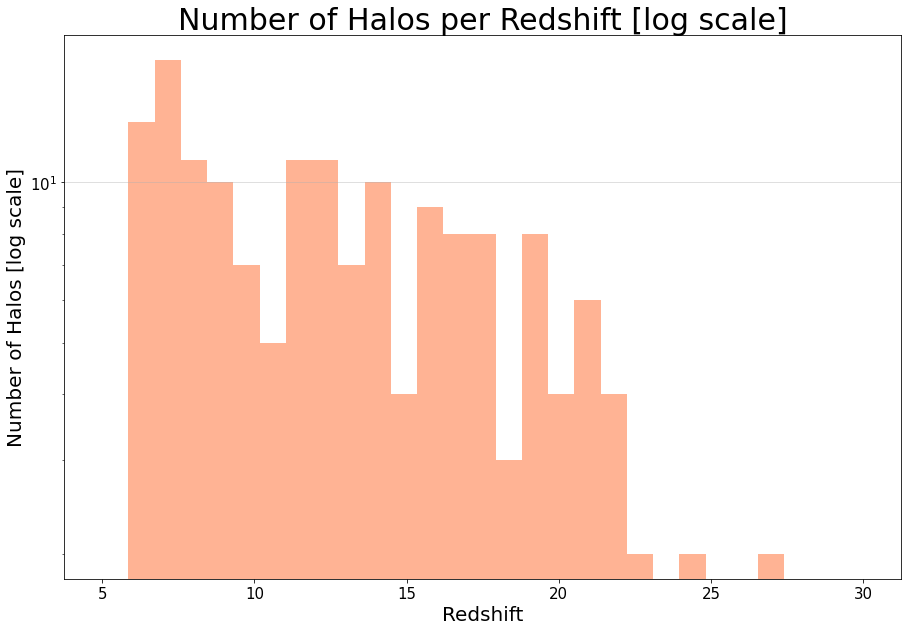

In [8]:
x = redshift

plt.figure(figsize=(15,10))
plt.hist(x, bins = np.linspace(5,30,30), color = 'lightsalmon', alpha= 0.8, log = 'True') #same as above
plt.title('Number of Halos per Redshift [log scale]', fontsize = 30)
plt.xlabel('Redshift', fontsize = 20)
plt.ylabel('Number of Halos [log scale]', fontsize = 20)
plt.xticks(fontsize = (15))
plt.yticks(fontsize = (15))
plt.grid(axis = 'y', alpha = 0.5)

In [14]:
for i in range(0,len(scale)):
    scale_bins = i*10 #number of million years in the simulation
#     print(scale[27])
#     if(scale[i] == scale[27]):
#         print(i)
#     print(scale[i])

<ipython-input-15-274ee49d4d02>:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xticks(fontsize = (15))


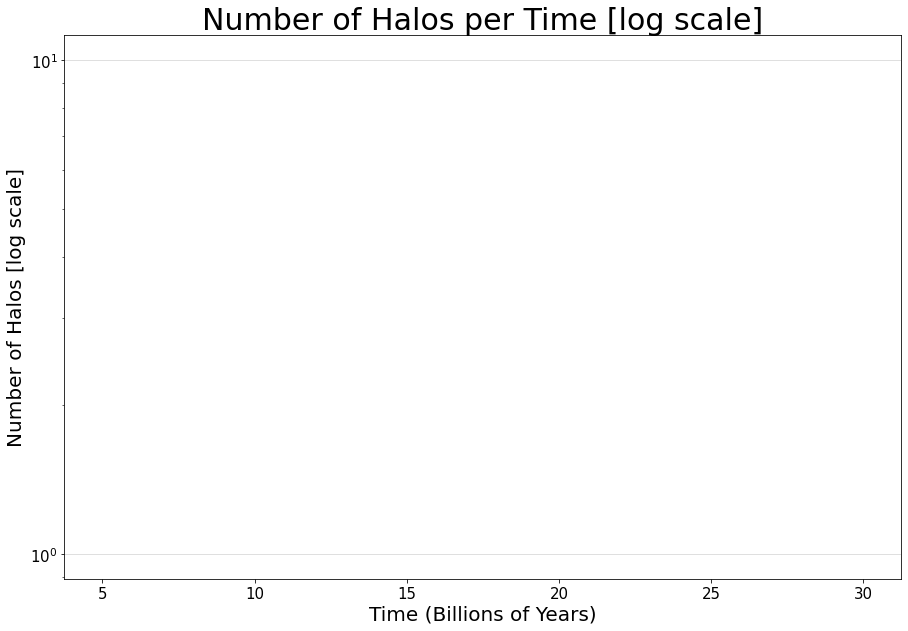

In [15]:
x = scale_bins

plt.figure(figsize=(15,10))
plt.hist(x, bins = np.linspace(5,30,30), color = 'lightgreen', alpha= 0.8, log = 'True') #same as above
plt.title('Number of Halos per Time [log scale]', fontsize = 30)
plt.xlabel('Time (Billions of Years)', fontsize = 20)
plt.ylabel('Number of Halos [log scale]', fontsize = 20)
plt.xticks(fontsize = (15))
plt.yticks(fontsize = (15))
plt.grid(axis = 'y', alpha = 0.5)